1. Linear models 

2. Logistic models 

3. Perceptron

4. FLDA 

5. Multi class discriminative models 

6. Support vector machines 

1. Medical Dataset:
	Linear Models : 1 vs. all 
	Logistic Models : 1 vs. all
	Multi class discriminative models (logistic multiclass) (softmax)
	perceptron : 1 vs. all
	svm
	FLDA

2. Railway Dataset:
	Linear Models : 1 vs. all
	Logistic Models : 1 vs. all
	perceptron : 1 vs. all
	svm
	FLDA

3. FMINST: apply PCA
	Linear Models : 1 vs. all
	Logistic Models : 1 vs. all
	Multi class discriminative models (logistic multiclass) (softmax)
	perceptron : 1 vs. all
	svm
	FLDA

4. River Dataset:
	Linear Models with various kernels
	FLDA



In [2]:
import json
import random
import time
import math
from ast import literal_eval as make_tuple
import numpy as np
import pandas as pd
# import psutil
from utils import mnist_reader
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [4]:
class multivariate_normal:
    def __init__(self,mean,cov):
        self.mean=mean
        self.cov=cov
    def pdf(self,x):
        return  (1/(np.power(2* np.pi,self.mean.shape[0]/2)*np.power(np.linalg.det(self.cov),0.5))) *np.exp (-0.5 * (np.linalg.multi_dot([(x - self.mean) , (np.linalg.inv(self.cov)), (x - self.mean).T])))
    

In [5]:
def univariate_normal(x,mean,var):
    return  (1/(np.power(2* np.pi*var,0.5))) * np.exp(-0.5 * np.array((x- mean)**2/var,dtype='float'))
def distance(a, b):
    return np.linalg.norm(a-b)

In [6]:
def binomial(test,prob,m):
    return [np.power(prob,x)*np.power(prob,(m-x))*comb(m,x) for x in test]
def comb(n,r):
    f=math.factorial
    return f(n)//f(r)//f(n-r)

In [12]:
# For linear regression and Logistic 
def gradient_descent(x_train, y_train, num_iters, learning_rate, lamda, theta,sig=0):
    X = np.array(x_train)
    Y = np.array(y_train)
    parameter = theta
    while (num_iters > 0):
        parameter = step_gradient(X, Y, learning_rate, parameter,lamda,sig)
        num_iters -= 1
    return parameter


def step_gradient(X, Y, learning_rate, parameter,lamda,sig=0):
    if(sig==0):
        cost = (np.dot(X, parameter) - Y)
    else : 
        cost = (sigmoid(np.dot(X, parameter)) - Y)
    temp = np.dot(X.T, cost)
    cost = np.linalg.norm(cost)
    # print(cost)
    parameter -= learning_rate * (1 / len(X)) * temp
    return parameter

In [13]:
# With Gradient Descent
class Linear_GRD:         
    
    def fit(self,train,y_train,lr,num_iters=1000,lamda=0,*args,**kwargs):
        self.theta = np.zeros((len(train[0]), len(y_train[0])), dtype=float)
        self.theta = gradient_descent(train, y_train, num_iters, lr, self.theta,lamda)
        
    def predict(self,test,y_test):
        predicted = np.dot(np.array(test), self.theta)
        correct = 0
        f_predicted = [None] * len(predicted)
        for i in range(len(predicted)):
            f_predicted[i] = np.argmax(predicted[i])
            if (f_predicted[i] - y_test[i] < 0.5
                    and f_predicted[i] - y_test[i] > -0.5):
                correct += 1
        acc=float(100 * correct / len(y_test))
        return predicted, acc


In [16]:
# With Ordinary Least Squares and lambda regularisation
class Linear_OLS:         
    
    def fit(self,train,y_train,lr,num_iters=1000,lamda=0,*args,**kwargs):
        self.theta =np.linalg.inv(np.dot(train.T, train))
        self.theta = np.dot(self.theta+lamda, np.dot(train.T, y_train))
        
    def predict(self,test,y_test):
        predicted = np.dot(np.array(test), self.theta)
        correct = 0
        f_predicted = [None] * len(predicted)
        for i in range(len(predicted)):
            f_predicted[i] = np.argmax(predicted[i])
            if (f_predicted[i] - y_test[i] < 0.5
                    and f_predicted[i] - y_test[i] > -0.5):
                correct += 1
        acc=float(100 * correct / len(y_test))
        return predicted, acc


In [13]:
class Logistic():
    
    def fit(self,train,y_train,lr,num_iters=1000,*args,**kwargs):
        self.theta = np.zeros((len(train[0]), len(y_train[0])), dtype=float)
        self.theta = gradient_descent(train, y_train, num_iters, lr, self.theta,1)
    def predict(self,test,y_test):
        predicted = np.dot(np.array(test), self.theta)
        correct = 0
        f_predicted = [None] * len(predicted)
        for i in range(len(predicted)):
            f_predicted[i] = np.argmax(predicted[i])
            if (f_predicted[i] - y_test[i] < 0.5
                    and f_predicted[i] - y_test[i] > -0.5):
                correct += 1
        acc=float(100 * correct / len(y_test))
        return predicted, acc


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [2]:
def predict(data_row, row_label, wt, corr_class):
    # data_row is n*1 and wt is n-1*1
    # data_row contains actual value also
    actual=row_label
    # print(wt)
    # print(data_row[:-1])
    val=np.dot(np.transpose(data_row),wt)
    # val=val1[0]
    deltaw=np.zeros(len(data_row))
    if((val>0 and actual==corr_class) or (val<0 and actual!=corr_class)):
        deltaw=deltaw
    elif(val<=0 and actual==corr_class):
        deltaw=data_row
    else:
        deltaw=-data_row
    wt=wt+deltaw
    return wt

def percept(train_data, train_label, wt, corr_class):
    # print(len(train_data))
    for i in range(len(train_data)):
        # print(i)
        wt=predict(train_data[i], train_label[i], wt, corr_class)
    # acc_train=checker(train_data, wt, corr_class)
    # print("training accuracy=" + str(acc_train))
    return wt

def checker(test, test_label, wts, numclass):
    stats=np.zeros([numclass, numclass])
    val=np.zeros(numclass)
    predicted=[]
    for i in range(len(test)):        
        actual=test_label[i]
        for j in range(numclass):
            val[j]=np.dot(np.transpose(test[i]),wts[j])
        predicted.append(np.argmax(val))
        stats[int(actual), int(predicted)]+=1
    acc=np.trace(stats)/np.sum(stats)*100
    return acc,predicted

In [3]:
class Perceptron:   
    def fit(self,train,y_train,numclass,numiter=100):
        self.numclass=numclass
        train_max=np.amax(train, axis=0)
        for i in range(len(train)):
            train[i]=np.divide(train[i], train_max)
        test_max=np.amax(test, axis=0)
        for i in range(len(test_data)):
            test[i]=np.divide(test[i], test_max)

        train_data=np.ones([len(train), len(train[0])+1])
        for i in range(len(train_data)):
            for j in range(len(train_data[0])):
                train_data[i][j+1]=train_data[i][j]
        train=train_data
        test_data=np.ones([len(test), len(test[0])+1])
        for i in range(len(test_data)):
            for j in range(len(test[0])):
                test_data[i][j+1]=test[i][j]
        test=test_data

        self.wts=np.zeros([numclass, len(train[0])])
        for k in range(numclass):
            for j in range(numiter):
                # print(wt)
                self.wts[k]=percept(train, y_train, self.wts[k], k)
    def predict(self,test,y_test):
        acc, predicted=checker(test, y_test,self.wts,self.numclass)

        
        

In [5]:
class SVM():
    
    def __init__(self, max_iter=10000, kernel_type='linear', C=1.0, epsilon=0.001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        # n : number of samples (100)
        n = X.shape[0]
        
        #we have alpha per sample of training set. Initially set to zeros
        alpha = np.zeros((n))
        
        #pick the kernel user selected
        kernel = self.kernels[self.kernel_type]
        
        
        iteration = 0
        while True:
            iteration += 1
            
            #saving the copy of alpha from previous iteration
            alpha_prev = np.copy(alpha)
            
            #going through all the samples in one iteration
            for j in range(0, n):
                
                #selcting random sample index where i is not equal to j
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                
                x_i = X[i,:]
                x_j = X[j,:]
                y_i = y[i]
                y_j = y[j]
                
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                
                if k_ij == 0:
                    continue
                
                #select alpha of i and j from the alpha array to calculate L and H
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Terminating condition: reacing convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            #Terminating condition: Reaching max iterations
            if iteration >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
            
        # Compute final model parameters
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
            
            
    def predict(self, X):
        return self.h(X, self.w, self.b)
    
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    
    def calc_w(self, alpha, y, X):
        return np.dot(alpha * y, X)
    
    # Prediction
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    
    # Prediction error
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
        
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    
    # Define kernels
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 2)
    
    #Printing out the parameters of SVM
    def print_info(self):
        print("############ PRINT SVM INFO ################")
        print("C:",self.C)
        print("max_iter:",self.max_iter)
        print("epsilon:",self.epsilon)
        print("kernel_type:",self.kernel_type)

    def calc_acc(self,y, y_hat):
    
        correct_counter = 0
        for i in range(0,len(y)):
            if(y[i] == -1 and y_hat[i] == -1):
                correct_counter = correct_counter + 1
            if(y[i] == 1 and y_hat[i] == 1):
                correct_counter = correct_counter + 1

        return (correct_counter/len(y))


    

In [ ]:
 def visualize():
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b (actually its a line)
        # v = x0.w0+x1.w1+b -> x1 = (v-w[0].x[0]-b)/w1
        #psv = 1     psv line ->  x.w+b = 1a small value of b we will increase it later
        #nsv = -1    nsv line ->  x.w+b = -1
        # dec = 0    db line  ->  x.w+b = 0
        def hyperplane(x,w,b,v):
            #returns a x2 value on line when given x1
            return (-w[0]*x-b+v)/w[1]
       
        hyp_x_min= self.min_feature_value*0.9
        hyp_x_max = self.max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,self.w,self.b,1)
        pav2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nav2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

In [41]:
class FLDA():
    def predict(self,test):
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
        self.n_features=train.shape[1]
      

In [41]:
class Mutilclass():
    def predict(self,test):   
        return 
        
    def fit(self, train,y):
        self.n_classes = np.max(y)+1
       

In [10]:
class PCA:
    def __init__(self,n_components,*args):
        self.n=n_components
    def fit_transform(self,X):
        return self.fit(X)
    def fit(self,copy):
        X=copy
        self.mean = np.mean(X, axis=0)
        X = X-self.mean
        C=np.cov(X.T)
#         pdb.set_trace()
        U, V=np.linalg.eig(C)
        self.components=V
        return np.dot(X,V)[:,:self.n]
   
    def transform(self,test):
        output = np.dot(test-self.mean, self.components)
        return output[:,:self.n]
   
        

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from scipy import interp
class metrics:
    def accuracy(self,y,preds):
        return np.sum(y==preds)/y.shape[0]
    
    def scores(self,y_true,y_pred):
        tp =(y_true == y_pred)
        tp_sum=np.bincount(y_true[tp].astype(int))
        pred_sum=np.bincount(y_pred.astype(int))
        true_sum=np.bincount(y_true.astype(int))
        precision = tp_sum/pred_sum
        recall = tp_sum/true_sum
        f_score = ((2) * precision * recall /
                   (precision + recall))
        precision = np.average(precision)
        recall = np.average(recall)
        f_score = np.average(f_score)

        return precision, recall, f_score
    
    def binary_roc_curve(self,y,probs,*args,**kwargs):
        y = (y == 1)

        desc_score_indices = np.argsort(probs)[::-1]
        probs = probs[desc_score_indices]
        y = y[desc_score_indices]
        distinct_value_indices = np.where(np.diff(probs))[0]
        threshold_idxs = np.r_[distinct_value_indices, y.size - 1]

        tps = y[threshold_idxs]
        fps = 1 + threshold_idxs - tps
        thresholds=y[threshold_idxs]
        optimal_idxs = np.where(np.r_[True,np.logical_or(np.diff(fps, 2),np.diff(tps, 2)),True])[0]
        fps = fps[optimal_idxs]
        tps = tps[optimal_idxs]
        thresholds = thresholds[optimal_idxs]
        print(fps,tps)
        fpr = fps / fps[-1]
        tpr = tps / tps[-1]

        return fpr, tpr, thresholds    
        
    def multiclass_roc_curve(self,y,y_score,ax,label,*args,**kwargs):
        n_classes=y.max()+1
#         print(n_classes)
        if(n_classes==2):
            y_test = np.array([1-y,y]).T
            print(y_test.shape)
        else:
            y_test = label_binarize(y, classes=np.arange(n_classes))
#         print(y_test)
        fpr = dict()
        thresholds=dict()
        tpr = dict()
        roc_auc = dict()
#         print(y_test.shape,y_score.shape)
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        ax.plot(fpr["macro"], tpr["macro"],label=label, linestyle=':', linewidth=4)


In [19]:
results=metrics()

# FASHION-MNIST

In [8]:
DATA_DIR='data/fashion/'
train, y_train = mnist_reader.load_mnist(path=DATA_DIR, kind='train')
test, y_test = mnist_reader.load_mnist(path=DATA_DIR, kind='t10k')

In [11]:
# from sklearn.decomposition import PCA
print(train.shape)
pca=PCA(n_components=2)
train=pca.fit_transform(train)
print(train.shape)
test=pca.transform(test)

(60000, 784)
(60000, 2)


In [12]:
print(test.shape)

(10000, 2)


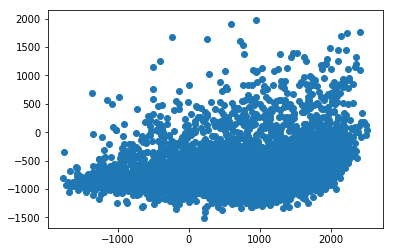

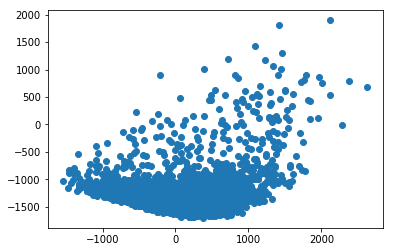

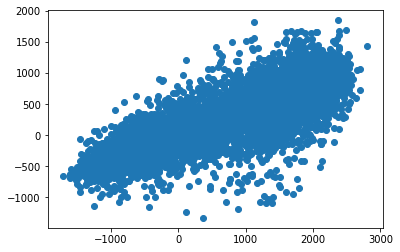

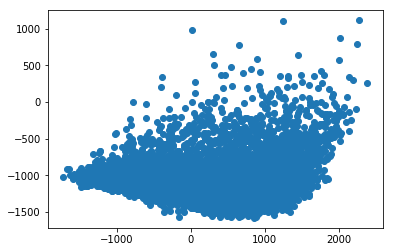

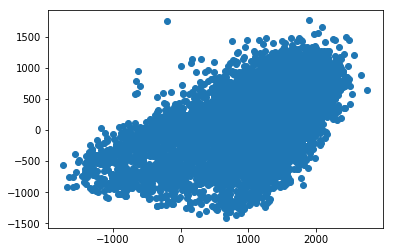

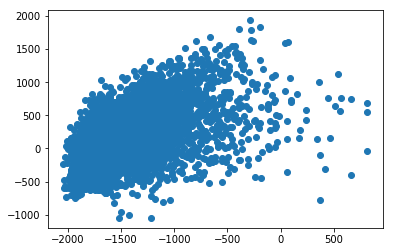

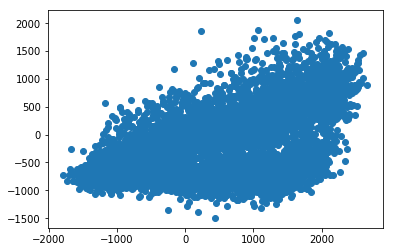

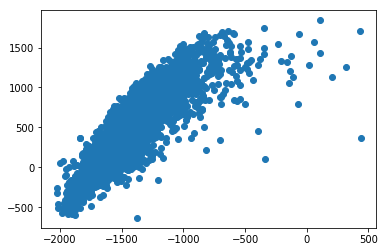

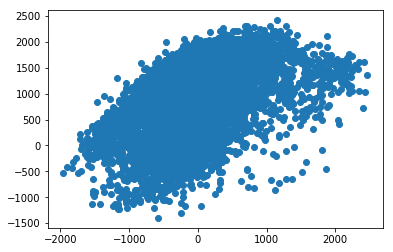

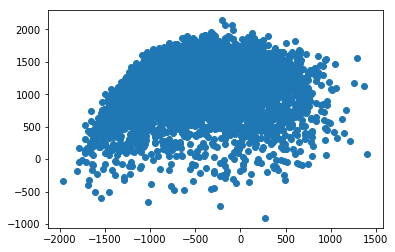

In [20]:

for i in range(10):
    fix,ax=plt.subplots()
    ax.scatter(train[y_train==i,0],train[y_train==i,1],label=i)
# ax.legend()

In [157]:
clf = GaussianNB()
clf.fit(train,y_train)
preds_tr, probs_tr_gnb=clf.predict(train)
preds, probs_gnb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.7591] [0.77198333]
(0.7599586688621425, 0.7591, 0.7586774323618745)


In [158]:
clf = GaussianBayes()
clf.fit(train,y_train)
preds_tr, probs_tr_gb=clf.predict(train)
preds, probs_gb=clf.predict(test)
acc_tr=np.sum(y_train==preds_tr)/y_train.shape
acc=np.sum(y_test==preds)/y_test.shape
print(acc,acc_tr)
print(results.scores(y_test,preds))

[0.7985] [0.80108333]
(0.8016677752883641, 0.7985, 0.7929446503371929)


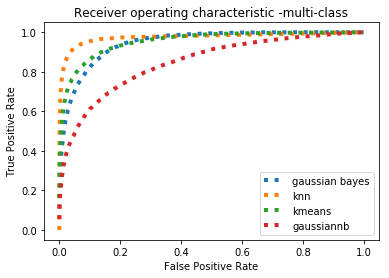

In [159]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,probs_knn,ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
ax.legend(loc="lower right")

In [160]:
fig.savefig('rocmnist')

# MEDICAL DATA

In [75]:
data = pd.read_csv('Medical_data.csv')
X = data.as_matrix()
print(X)
y=np.empty(X.shape[0])
for i in range(X.shape[0]):
    if(X[i,0]=='HEALTHY'):
        y[i]=0
    if(X[i,0]=='SURGERY'):
        y[i]=1
    if(X[i,0]=='MEDICATION'):
        y[i]=2
print(y.shape)
X = X[:,1:4]
y=np.array(y,dtype='int')

[['HEALTHY' 1.6315155608144196 -0.26444658130172355 2.534567146651425]
 ['SURGERY' 0.15395105426389907 1.419533481505174 1.3331207912724836]
 ['HEALTHY' 2.021729118164318 0.26204637889999405 2.8799717380508727]
 ...
 ['HEALTHY' 0.19320188275265227 0.36039894430698144 1.8676445668171464]
 ['HEALTHY' 1.6840959730399991 -0.02321819895892971 3.306257682435044]
 ['MEDICATION' 0.9752179047232428 2.305958926888452 0.22982688347681815]]
(3000,)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [76]:
data_test = pd.read_csv('test_medical.csv')
X_test = data_test.as_matrix()
# print(X)
y_test=np.empty(X_test.shape[0])
for i in range(X_test.shape[0]):
    if(X_test[i,0]=='HEALTHY'):
        y_test[i]=0
    if(X_test[i,0]=='SURGERY'):
        y_test[i]=1
    if(X_test[i,0]=='MEDICATION'):
        y_test[i]=2
print(y_test.shape)  
X_test = X_test[:,1:4]
y_test=np.array(y_test,dtype='int')

(3000,)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [77]:
train=X
y_train=y
test=X_test
print(y_train)

[0 1 0 ... 0 0 2]


In [78]:
print(train.shape,y_train.shape)

(3000, 3) (3000,)


In [3]:
# X = np.array(train)
# y = np.array(y_train)
# label_dict = {1: 'HEALTHY', 2: 'MEDICATION', 3: 'SURGERY'}

# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# for ax, cnt in zip(axes.ravel(), range(4)):

#     min_b = math.floor(np.min(X[:, cnt]))
#     max_b = math.ceil(np.max(X[:, cnt]))
#     bins = np.linspace(min_b, max_b, 100)

#     for lab, col in zip(range(1, 4), ('blue', 'red', 'green')):
#         X_temp = []
#         for i in range(len(X)):
#             if ((y[i] - lab) == 0):
#                 X_temp.append(X[i, cnt])
#         ax.hist(
#             X_temp,
#             color=col,
#             label='class %s' % label_dict[lab],
#             bins=bins,
#             alpha=0.5,
#         )
#     ylims = ax.get_ylim()

#     leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
#     leg.get_frame().set_alpha(0.5)
#     ax.set_ylim([0, max(ylims) + 2])
#     ax.set_xlabel('feature #%s' % str(cnt))

#     ax.tick_params(
#         axis="both",
#         which="both",
#         bottom="off",
#         top="off",
#         labelbottom="on",
#         left="off",
#         right="off",
#         labelleft="on")

#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["bottom"].set_visible(False)
#     ax.spines["left"].set_visible(False)

# axes[0][0].set_ylabel('count')
# axes[1][0].set_ylabel('count')

# fig.tight_layout()

# plt.show()


In [6]:

i=2
acc_tr=[]
acc=[]
clf=GMMNB(i)
clf.fit(train,y_train)
preds_tr=clf.predict(train)
preds=clf.predict(test)
acc_tr.append(results.accuracy(y_train, preds_tr))
acc.append(results.accuracy(y_test, preds))
print(acc,acc_tr)
print(results.scores(y_test,preds))

In [91]:
for i in range(len(probs_knn)):
    while(probs_knn[i].shape[0]<3):
        probs_knn[i]=np.append(probs_knn[i],[0.00])

probs_knn=np.asarray(probs_knn)

3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)
3
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [0 0 1]]
(3000, 3) (3000, 3)


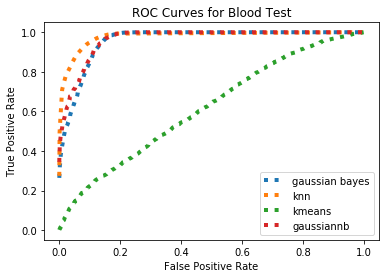

In [93]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves for Blood Test')
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,np.asarray(probs_knn),ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
ax.legend(loc="lower right")

In [94]:
fig.savefig('rocmedical')

# TRAIN SELECTION DATA

In [9]:
data = pd.read_csv('railwayBookingList.csv')

In [10]:
print(data.head())

       caseID  boarded  budget  memberCount preferredClass     sex  age
0   111131089        0    2201            0       FIRST_AC  female    2
1  2489059216        0    1775            3       FIRST_AC    male    0
2  1565109576        1    1775            3       FIRST_AC  female    0
3  1373075087        1    1775            3       FIRST_AC    male    3
4  1598041082        1    1775            3       FIRST_AC  female    2


In [11]:

dict_class={'FIRST_AC':0,'SECOND_AC':1,'THIRD_AC':2,'NO_PREF':3}
for i in range(data.shape[0]):
    data['preferredClass'][i]=dict_class[data['preferredClass'][i]]
    

/home/khushal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
data['sex'][(data['sex']=='male')]=0
data['sex'][(data['sex']=='female')]=1

/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
sorted_b=np.sort(np.array(data['budget'].unique()))
for x,i in enumerate(sorted_b):
        data['budget'][data['budget']==i]=x

/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [42]:
data.head()

,caseID,boarded,budget,memberCount,preferredClass,sex,age
0,111131089,0,17,0,0,1,2
1,2489059216,0,15,3,0,0,0
2,1565109576,1,15,3,0,1,0
3,1373075087,1,15,3,0,0,3
4,1598041082,1,15,3,0,1,2


In [43]:
y=data['boarded']
X = data.as_matrix()
X=X[:-1,2:]
y=y[:-1]
y=np.array(y)
print(X.shape)

(1309, 5)


/home/khushal/anaconda2/envs/dl/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
    train, y_train = X[train_index], y[train_index]
    test, y_test = X[test_index], y[test_index]

In [45]:
y_train=np.array(y_train)
train=np.array(train)
test=np.array(test)
y_test=np.array(y_test)


In [24]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr,label='Train Accuracy')
# ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
# ax.legend(loc='lower right')
# print(train.shape)
# fig.savefig('kmeanstrs.png')

In [23]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr,label='Train Accuracy')
# ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
# ax.legend(loc='upper right')
# # fig.savefig('knntrs.png')

In [21]:
# n_class=y_train.max()+1
# for j in range(n_class):
#     fig,ax=plt.subplots()
#     for i in range(train.shape[1]):
#         ax.hist(list(train[(y_train==j),i]))
#     fig.savefig('train_selection_class_cond'+str(j)+'.png')

In [51]:
# print(acc,acc_tr)
# print(results.scores(y_test,preds))

(262,) (262, 2)
(262, 2)
(262, 2)
(262, 2)
(262, 2)


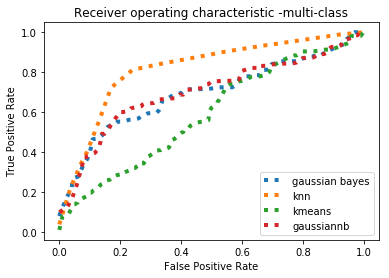

In [137]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
print(y_test.shape,probs_gb.shape)
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,probs_knn,ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
# # results.multiclass_roc_curve(y_test,probs_bnb,ax,'binomial plus gaussian')
ax.legend(loc="lower right")

# RIVER DATA

In [12]:
data = pd.read_csv('Assignment2_river_data.csv')

In [13]:
print(data.head())

           x     Levels
0  44.596425  21.925297
1  89.657299  18.455560
2  53.191569  22.919871
3  30.698490  17.192925
4  46.622882  22.349338


In [14]:
data.head()

,x,Levels
0,44.596425,21.925297
1,89.657299,18.455560
2,53.191569,22.919871
3,30.698490,17.192925
4,46.622882,22.349338


In [15]:
X=data['x']
y=data['Levels']

In [16]:
print(y.shape)

(10000,)


In [18]:
# train_index=np.random.randint()
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# sss.get_n_splits(X, y)
# for train_index, test_index in sss.split(X, y):
#     train, y_train = X[train_index], y[train_index]
#     test, y_test = X[test_index], y[test_index]

In [28]:
# y_train=np.array(y_train)
# train=np.array(train)
# test=np.array(test)
# y_test=np.array(y_test)


In [24]:
# fig,ax=plt.subplots()
# ax.scatter(list(x),acc_tr,label='Train Accuracy')
# ax.scatter(list(x),acc,color='r',label='Validation Accuracy')
# ax.legend(loc='lower right')
# print(train.shape)
# fig.savefig('linearriver.png')

In [21]:
# n_class=y_train.max()+1
# for j in range(n_class):
#     fig,ax=plt.subplots()
#     for i in range(train.shape[1]):
#         ax.hist(list(train[(y_train==j),i]))
#     fig.savefig('train_selection_class_cond'+str(j)+'.png')

In [51]:
# print(acc,acc_tr)
# print(results.scores(y_test,preds))

(262,) (262, 2)
(262, 2)
(262, 2)
(262, 2)
(262, 2)


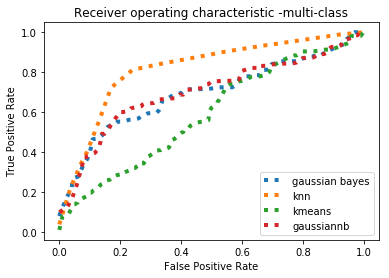

In [137]:
fig,ax=plt.subplots()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic -multi-class')
print(y_test.shape,probs_gb.shape)
results.multiclass_roc_curve(y_test,probs_gb,ax,'gaussian bayes')
results.multiclass_roc_curve(y_test,probs_knn,ax,'knn')
results.multiclass_roc_curve(y_test,probs_kmeans,ax,'kmeans')
results.multiclass_roc_curve(y_test,probs_gnb,ax,'gaussiannb')
# # results.multiclass_roc_curve(y_test,probs_bnb,ax,'binomial plus gaussian')
ax.legend(loc="lower right")

In [138]:
fig.savefig('roctrs')

# FINAL RESULTS

|Dataset| Classifier  |   Parameter | Accuracy |Precision | Recall | F1-score |
|--------|:-------:|-----|-------|------|-------|-------|
|Medical Data|KNeighbours|9| 89.5| 89.85|89.5| 89.57| 
|Medical Data|Gaussian Bayes|-|89.76 |89.95 |89.76| 89.81| 
|Medical Data|Gaussian Mixture Model Naive Bayes|2| 89.86| 90.00|89.86| 89.90| 
|Medical Data|Gaussian NB|-| 89.86| 90.00|89.86| 89.90|  
|Medical Data|KMeans|50| 86.93| 87.91|86.93| 86.95| 
|Medical Data|Parzen Window|| 90.1| 89.6|89.7| 89.3| 
|Train Selection Data|KNeighbours|7| 77.48| 76.20|75.66| 75.90| 
|Train Selection Data|Gaussian Bayes|-| 80.53|79.51 |78.9|79.17 | 
|Train Selection Data|Gaussian NB|-| 80.53|79.36 |79.47|79.41 | 
|Train Selection Data|Bionomial NB||38.16 | 381.6|80.86| 51.2| 
|Train Selection Data|KMeans|300| 71.75| 71.87 | 71.75| 71.46| 
|Train Selection Data|KMeans|300| 71.75| 71.87 | 71.75| 71.46| 
|Train Selection Data|Parzen Window|| 75.1|74.7|74.9| 74.85| 
|Fashion-MNIST|KNeighbours|9| 85.3|85.336 |85.3| 85.24| 
|Fashion-MNIST|Gaussian Bayes|-| 79.85|80.16 |79.85| 79.29| 
|Fashion-MNIST|Gaussian NB|-|75.91 |76 |75.9| 75.86| 
|Fashion-MNIST|KMeans|150| 75.16|74.82 |75.16| 74.73|
|Fashion-MNIST|KMeans|150| 75.16|74.82 |75.16| 74.73|

|Dataset| Classifier|Parameter|Accuracy|Precision|Recall|F1-score|
|--------|-------|-----|-------|------|-------|-------|
|Medical Data|Linear Models|9| 85.3|85.336 |85.3| 85.24| 
|Medical Data|Logistic Regression|-| 79.85|80.16 |79.85| 79.29| 
|Medical Data|SVM|-|75.91 |76 |75.9| 75.86| 
|Medical Data|Multi Class Discriminative Model|150| 75.16|74.82 |75.16| 74.73|
|Medical Data|FLDA|9| 89.5| 89.85|89.5| 89.57| 
|Medical Data|Perceptron|9| 89.5| 89.85|89.5| 89.57| 
|Train Selection Data|Linear Models|9| 85.3|85.336 |85.3| 85.24| 
|Train Selection Data|Logistic Regression|-| 79.85|80.16 |79.85| 79.29| 
|Train Selection Data|SVM|-|75.91 |76 |75.9| 75.86| 
|Train Selection Data|Multi Class Discriminative Model|150| 75.16|74.82 |75.16| 74.73|
|Train Selection Data|FLDA|9| 89.5| 89.85|89.5| 89.57| 
|Train Selection Data|Perceptron|9| 89.5| 89.85|89.5| 89.57| 
|Fashion-MNIST|Linear Models|9| 85.3|85.336 |85.3| 85.24| 
|Fashion-MNIST|Logistic Regression|-| 79.85|80.16 |79.85| 79.29| 
|Fashion-MNIST|SVM|-|75.91 |76 |75.9| 75.86| 
|Fashion-MNIST|Multi Class Discriminative Model|150| 75.16|74.82 |75.16| 74.73|
|Fashion-MNIST|FLDA|9| 89.5| 89.85|89.5| 89.57| 
|Fashion-MNIST|Perceptron|9| 89.5| 89.85|89.5| 89.57| 
|River Data|Linear Models|9| 85.3|85.336 |85.3| 85.24| 
|River Data|Logistic Regression|-| 79.85|80.16 |79.85| 79.29| 
|River Data|SVM|-|75.91 |76 |75.9| 75.86| 
|River Data|Multi Class Discriminative Model|150| 75.16|74.82 |75.16| 74.73|
|River Data|FLDA|9| 89.5| 89.85|89.5| 89.57| 
|River Data|Perceptron|9| 89.5| 89.85|89.5| 89.57| 